<center>

# Recursive Differentiation From Scratch

</center>

## Importing the Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")
dpi = 400

## Using Limits (Numerical Method)

In many real-world applications, we might not have an analytical form of a derivative, but we can approximate it using numerical methods. One common and accurate technique is the **central difference method**.

## 💡 1. What is Numerical Differentiation?

Numerical differentiation is the process of estimating the derivative of a function using its values at specific points. For example, the first derivative of a function $f(x)$ can be approximated as:

### 🔹 Forward Difference:
$$
f'(x) \approx \frac{f(x + h) - f(x)}{h}
$$

### 🔹 Backward Difference:
$$
f'(x) \approx \frac{f(x) - f(x - h)}{h}
$$

### 🔹 Central Difference (More Accurate):
$$
f'(x) \approx \frac{f(x + h) - f(x - h)}{2h}
$$

## 🧠 2. Why Central Difference?

- The central difference formula is **second-order accurate**, i.e., the error term is $\mathcal{O}(h^2)$.
- It is more symmetric and provides better accuracy for smooth functions.

## 🔁 3. Higher-Order Derivatives

We can extend this idea recursively to compute the $n^\text{th}$ derivative:

### Recursive Central Difference:
$$
f^{(n)}(x) \approx \frac{f^{(n-1)}(x + h) - f^{(n-1)}(x - h)}{2h}
$$

With base case:
$$
f^{(1)}(x) \approx \frac{f(x + h) - f(x - h)}{2h}
$$

## ⚖️ 4. Choosing the Right Step Size $h$

- Too **large**: high **truncation error** (inaccurate approximation).
- Too **small**: high **round-off error** due to floating-point precision limits.

### General Recommendation:
$$
h \in [10^{-5}, 10^{-8}]
$$

## 🧪 5. Example: Derivatives of $\sin(x)$

We compute numerical derivatives of $\sin(x)$ from order $n = 1$ to $8$, and compare them with the true derivatives:


| $n$ | True Derivative     |
|--------|----------------------|
| 1      | $\cos(x)$        |
| 2      | $-\sin(x)$       |
| 3      | $-\cos(x)$       |
| 4      | $\sin(x)$        |
| ...    | Periodic (repeats every 4) |


We also visualize the **absolute error**:
$$
\text{Error}(x) = \left| f^{(n)}_{\text{true}}(x) - f^{(n)}_{\text{numerical}}(x) \right|
$$

## ✅ 6. Observations

- The method is **accurate for low-order derivatives**.
- For higher $n$, numerical instability and error accumulation become significant.
- This is a good practical method when the analytical derivative is unavailable or difficult to compute.


In [2]:
x = np.linspace(-4*np.pi, 4*np.pi, 800)
def sin(x):
    return np.sin(x)

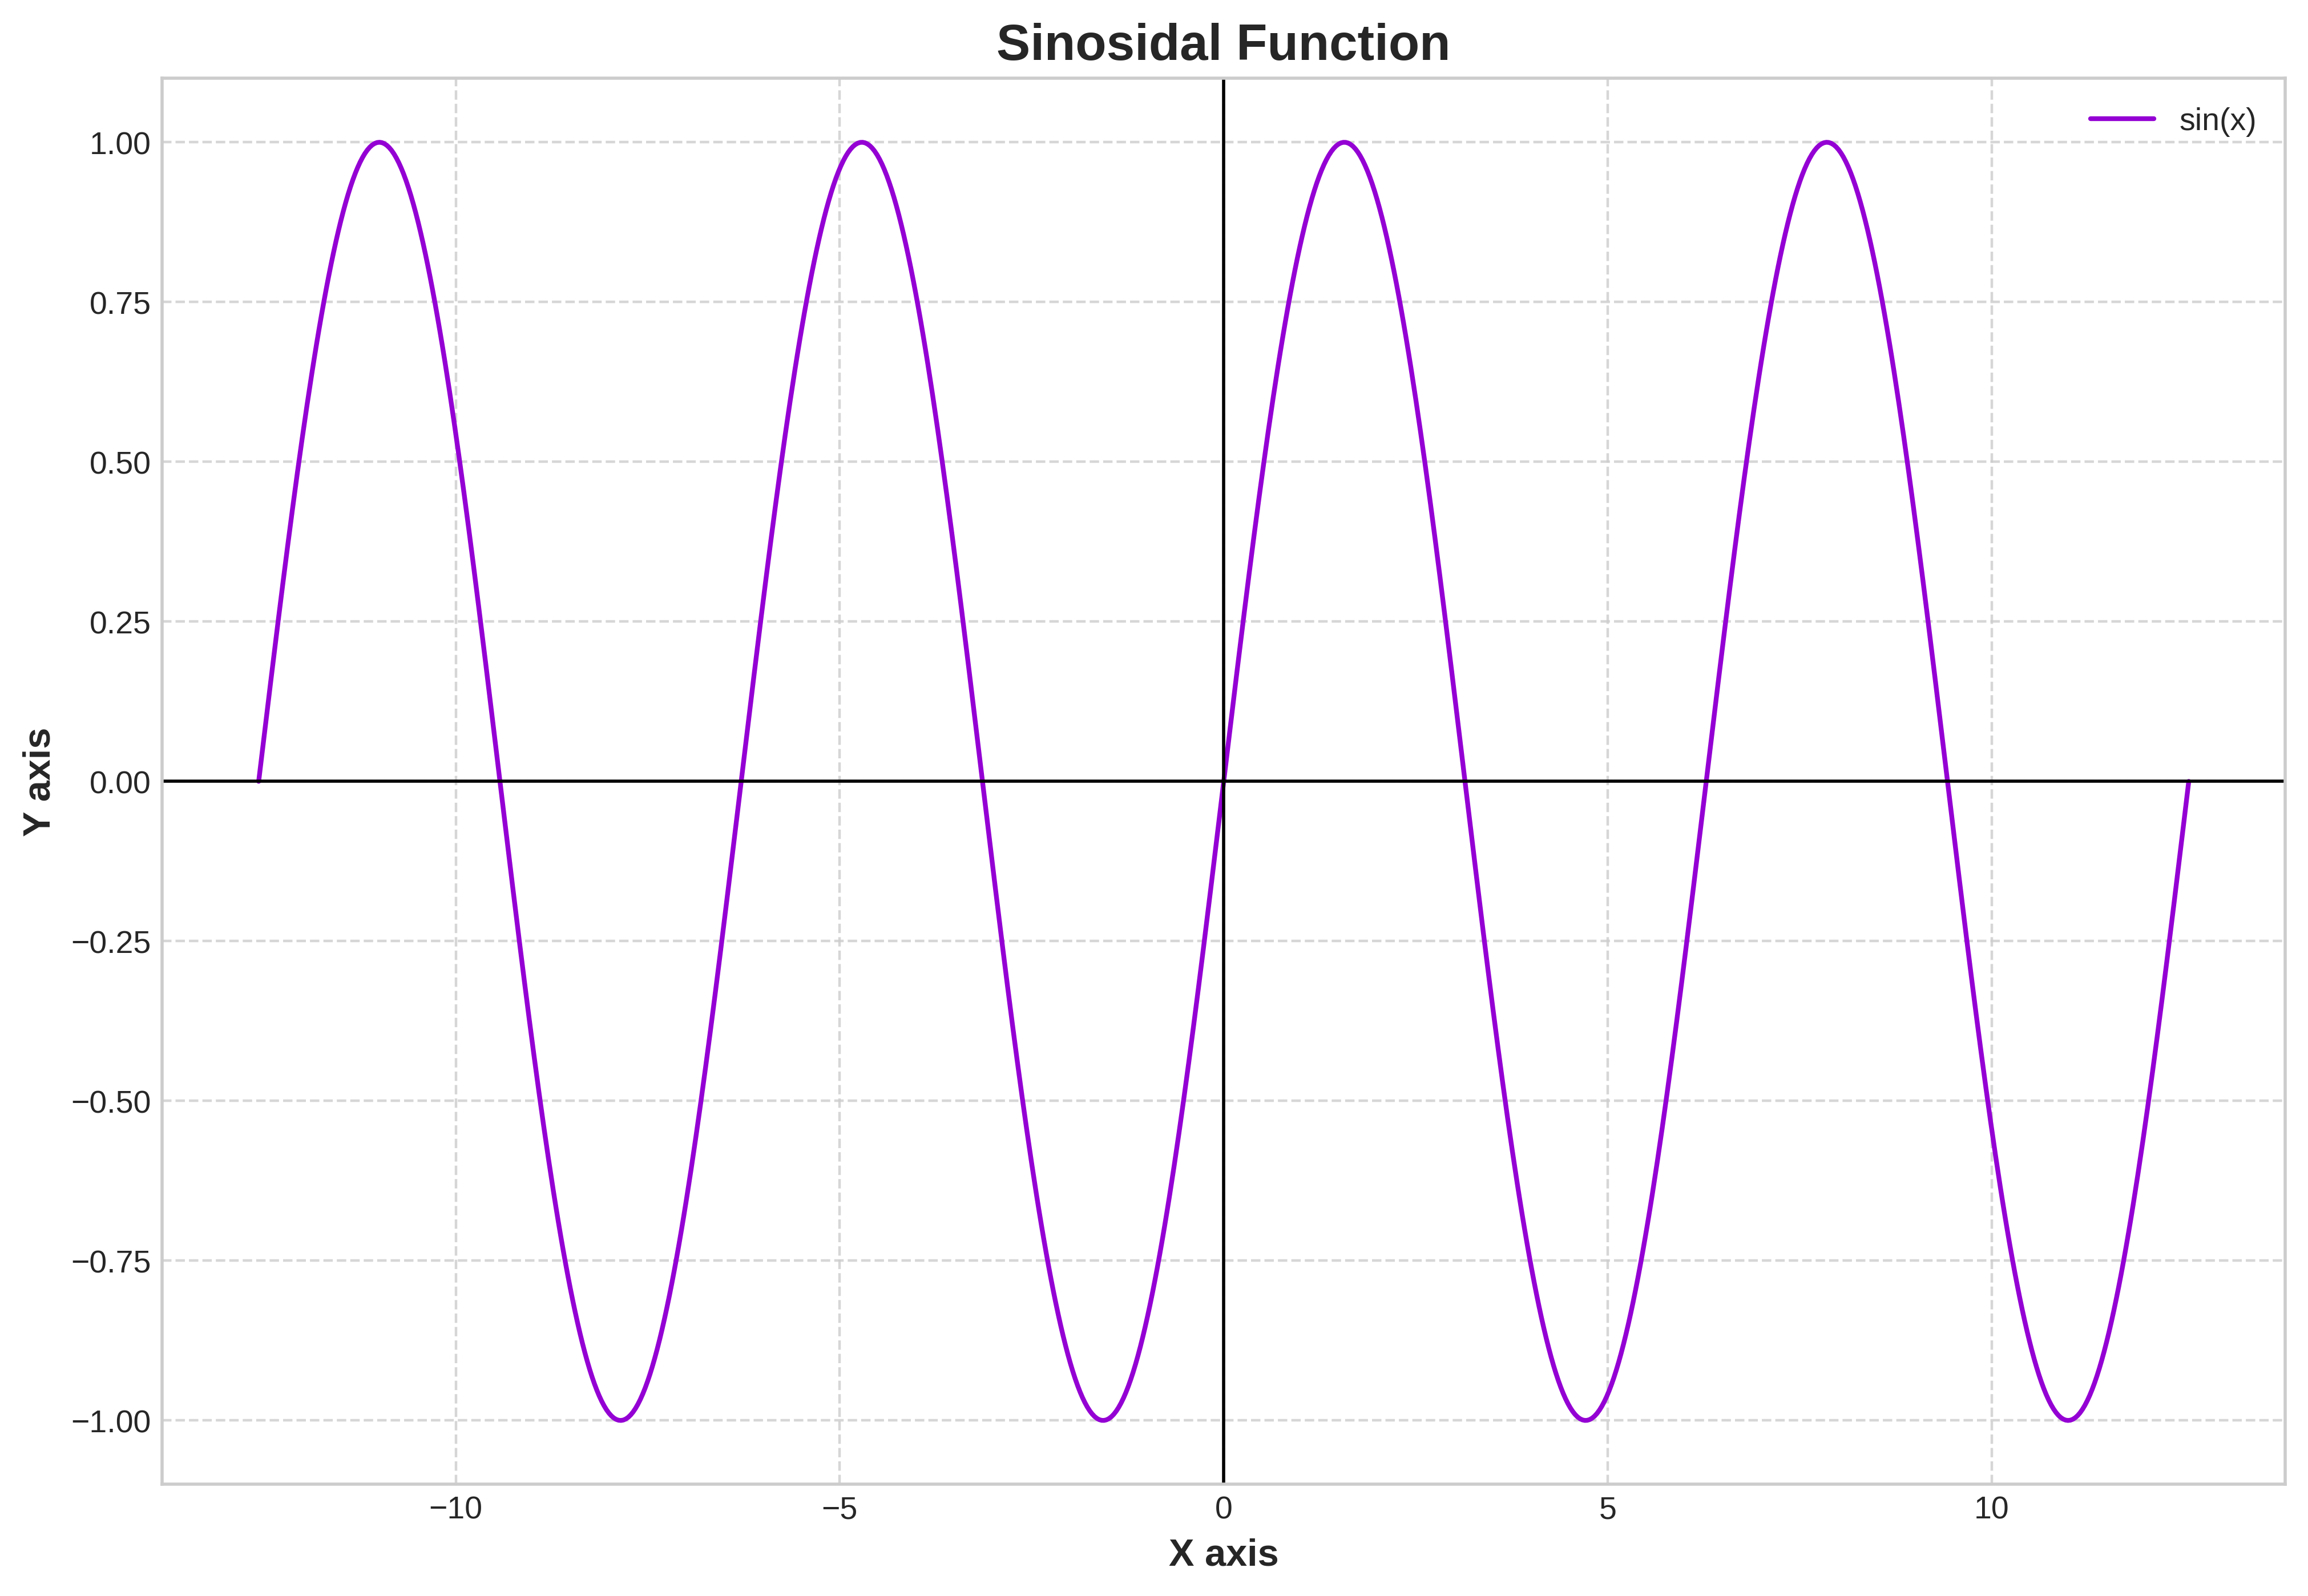

In [3]:
y = sin(x)

plt.figure(figsize=(12, 8), dpi=dpi)
plt.plot(x, y, label="sin(x)", color="darkviolet")
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.title("Sinosidal Function", fontsize=16, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()

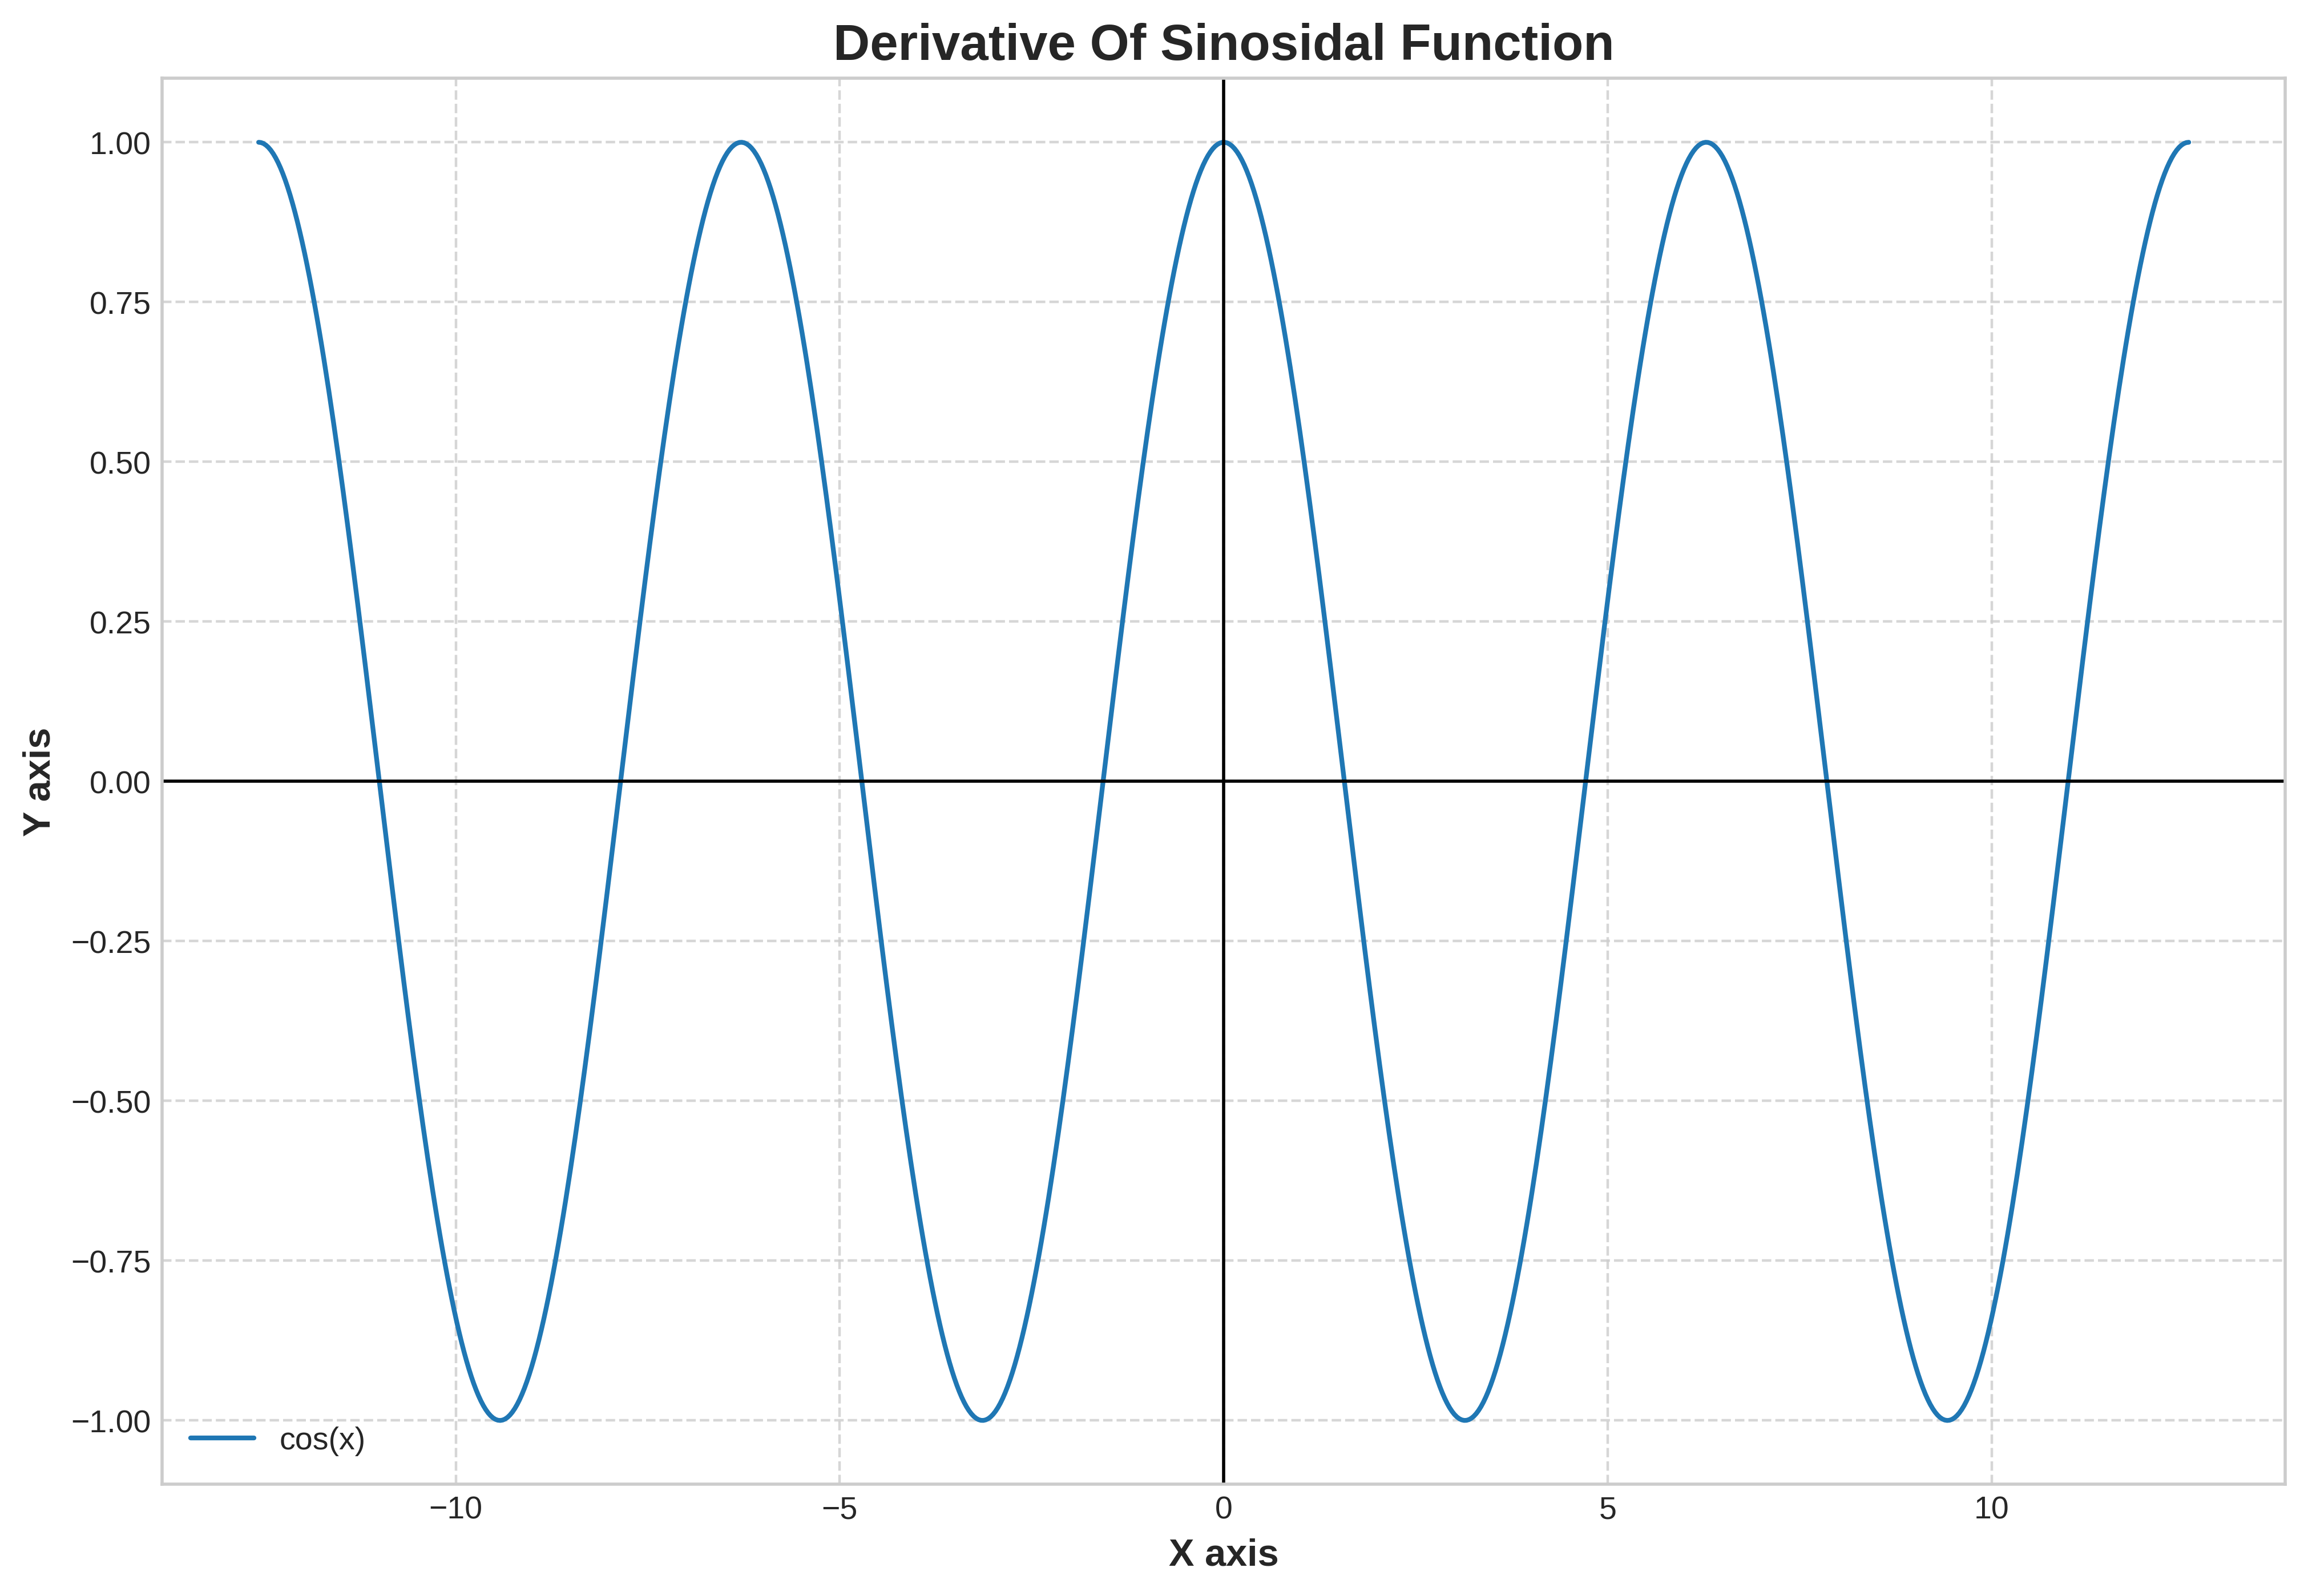

In [4]:
h = 1e-5
y1 = (sin(x+h) - sin(x-h)) / (2*h)

plt.figure(figsize=(12, 8), dpi=dpi)
plt.plot(x, y1, label="cos(x)")
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.title("Derivative Of Sinosidal Function", fontsize=16, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()

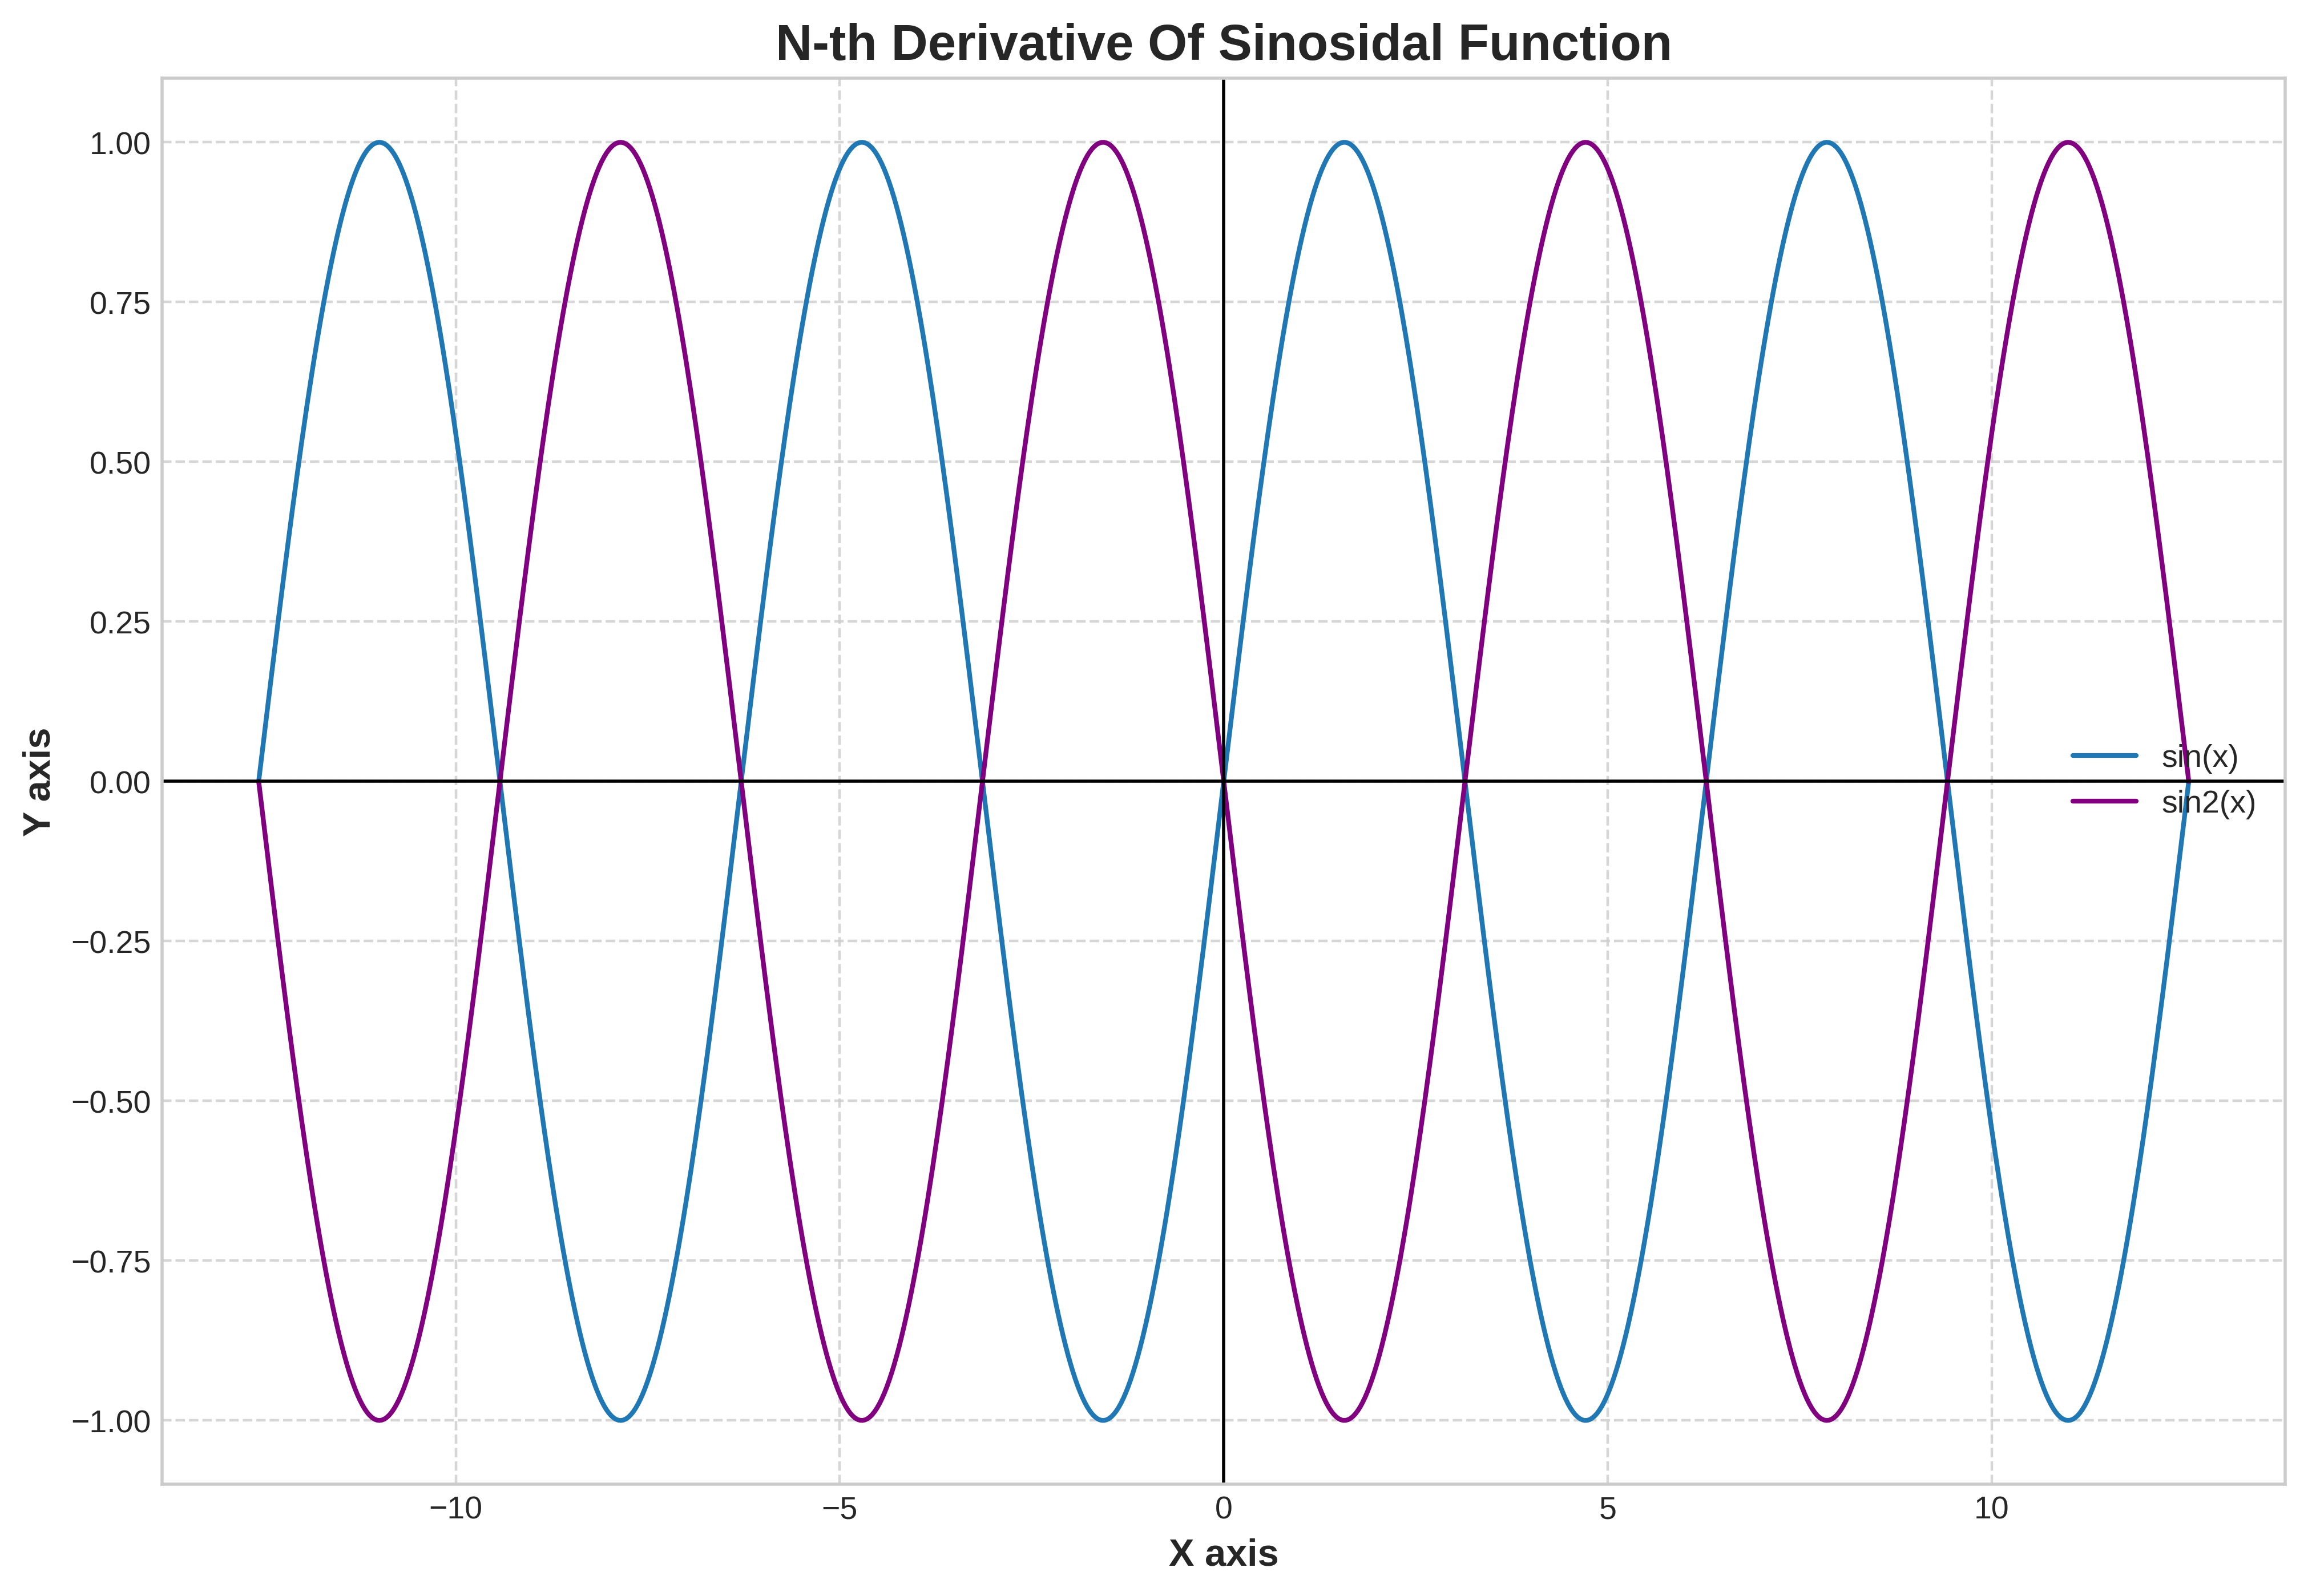

In [5]:
def differentiate(func, x, n, h=1e-2):
    if n==1:
        return (func(x+h) - func(x-h)) / (2*h)
    left = differentiate(func=func, x=x+h, n=n-1)
    right = differentiate(func=func, x=x-h, n=n-1)
    return (left - right) / (2*h)
n = 2
y = sin(x)
y1 = differentiate(func=sin, x=x, n=n)

plt.figure(figsize=(12, 8), dpi=dpi)
plt.plot(x, y, label="sin(x)")
plt.plot(x, y1, label=f"sin{n}(x)", color="purple")
plt.axhline(y=0, color='black', linewidth=1)
plt.axvline(x=0, color='black', linewidth=1)
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.title("N-th Derivative Of Sinosidal Function", fontsize=16, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()

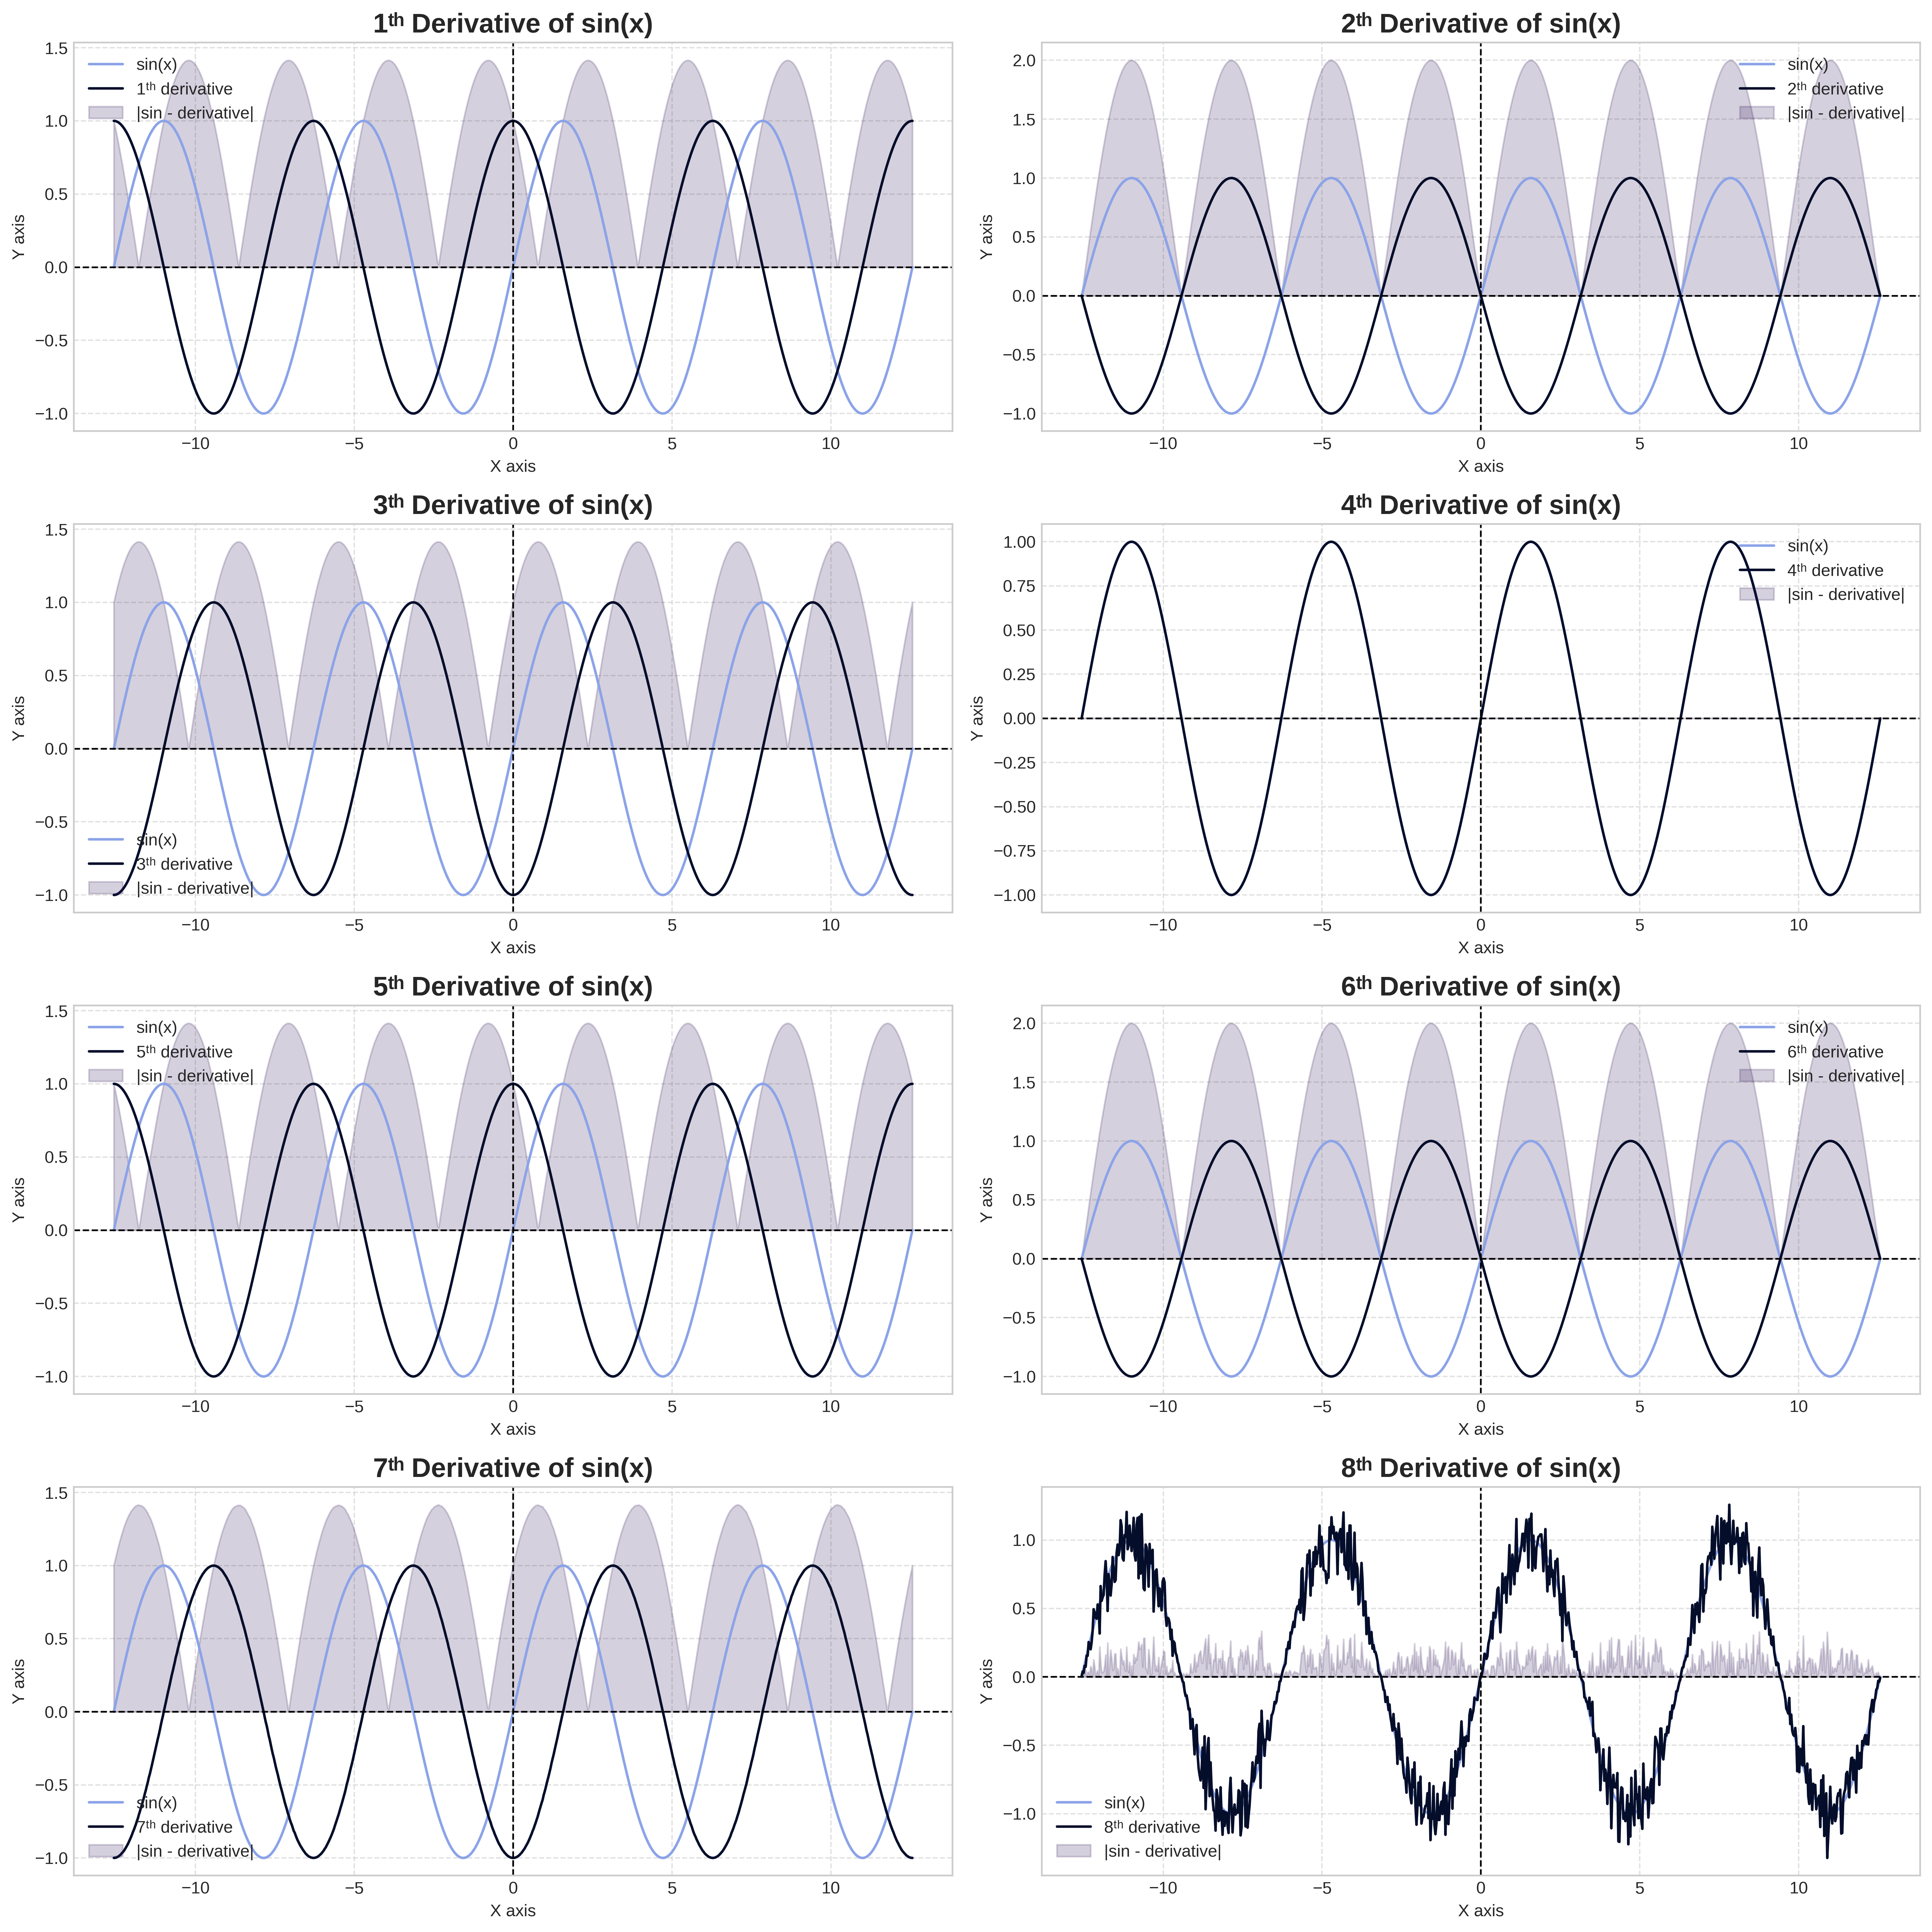

In [6]:
fig, axes = plt.subplots(4, 2, figsize=(16, 16), dpi=dpi)
axes = axes.flatten()

y = sin(x)

for n in range(1, 9):
    y_n = differentiate(func=sin, x=x, n=n)

    ax = axes[n - 1]
    ax.plot(x, y, label="sin(x)", color='#8ba3e8')
    ax.plot(x, y_n, label=f"{n}ᵗʰ derivative", color='#040e2b')
    ax.fill_between(x, np.abs(y - y_n), color="#301857", alpha=0.2, label="|sin - derivative|")
    ax.axhline(y=0, color='black', linewidth=1, linestyle='--')
    ax.axvline(x=0, color='black', linewidth=1, linestyle='--')
    ax.set_title(f"{n}ᵗʰ Derivative of sin(x)", fontsize=16, weight="bold")
    ax.set_xlabel("X axis", fontsize=10)
    ax.set_ylabel("Y axis", fontsize=10)
    ax.legend()
    ax.grid(linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

## Plotting The Errors Of Differentiation

## 🔍 Understanding $O(h^2)$ Error in Central Difference

### What does $O(h^2)$ mean?

It means that the **error** in the approximation is proportional to $h^2$ when $h \to 0$.

In practical terms:

$$
\text{Error}(h) \approx C \cdot h^2 \quad \text{for some constant } C
$$

So, if you halve $h$, the error reduces by a factor of 4:

$$
\left(\frac{h}{2}\right)^2 = \frac{h^2}{4}
$$



### 🧠 Why is Central Difference $O(h^2)$?

Let’s consider the Taylor expansions of $f(x+h)$ and $f(x-h)$:

$$
f(x+h) = f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6} f'''(x) + \cdots
$$

$$
f(x-h) = f(x) - h f'(x) + \frac{h^2}{2} f''(x) - \frac{h^3}{6} f'''(x) + \cdots
$$

Now subtract the two:

$$
f(x+h) - f(x-h) = 2h f'(x) + \frac{2h^3}{6} f'''(x) + \cdots
$$

Divide both sides by $2h$:

$$
\frac{f(x+h) - f(x-h)}{2h} = f'(x) + \frac{h^2}{3} f'''(x) + \cdots
$$

* ✅ The first term is the **true derivative**.
* ⚠️ The second term is the **leading error**: $\frac{h^2}{3} f'''(x)$

So, the **error is proportional to $h^2$**:

$$
\text{Error} = O(h^2)
$$


### ✨ Summary of Derivative Methods

| Method              | Approximation Formula        | Error Order |
| ------------------- | ---------------------------- | ----------- |
| Forward Difference  | $\frac{f(x+h) - f(x)}{h}$    | $O(h)$      |
| Backward Difference | $\frac{f(x) - f(x-h)}{h}$    | $O(h)$      |
| Central Difference  | $\frac{f(x+h) - f(x-h)}{2h}$ | $O(h^2)$    |



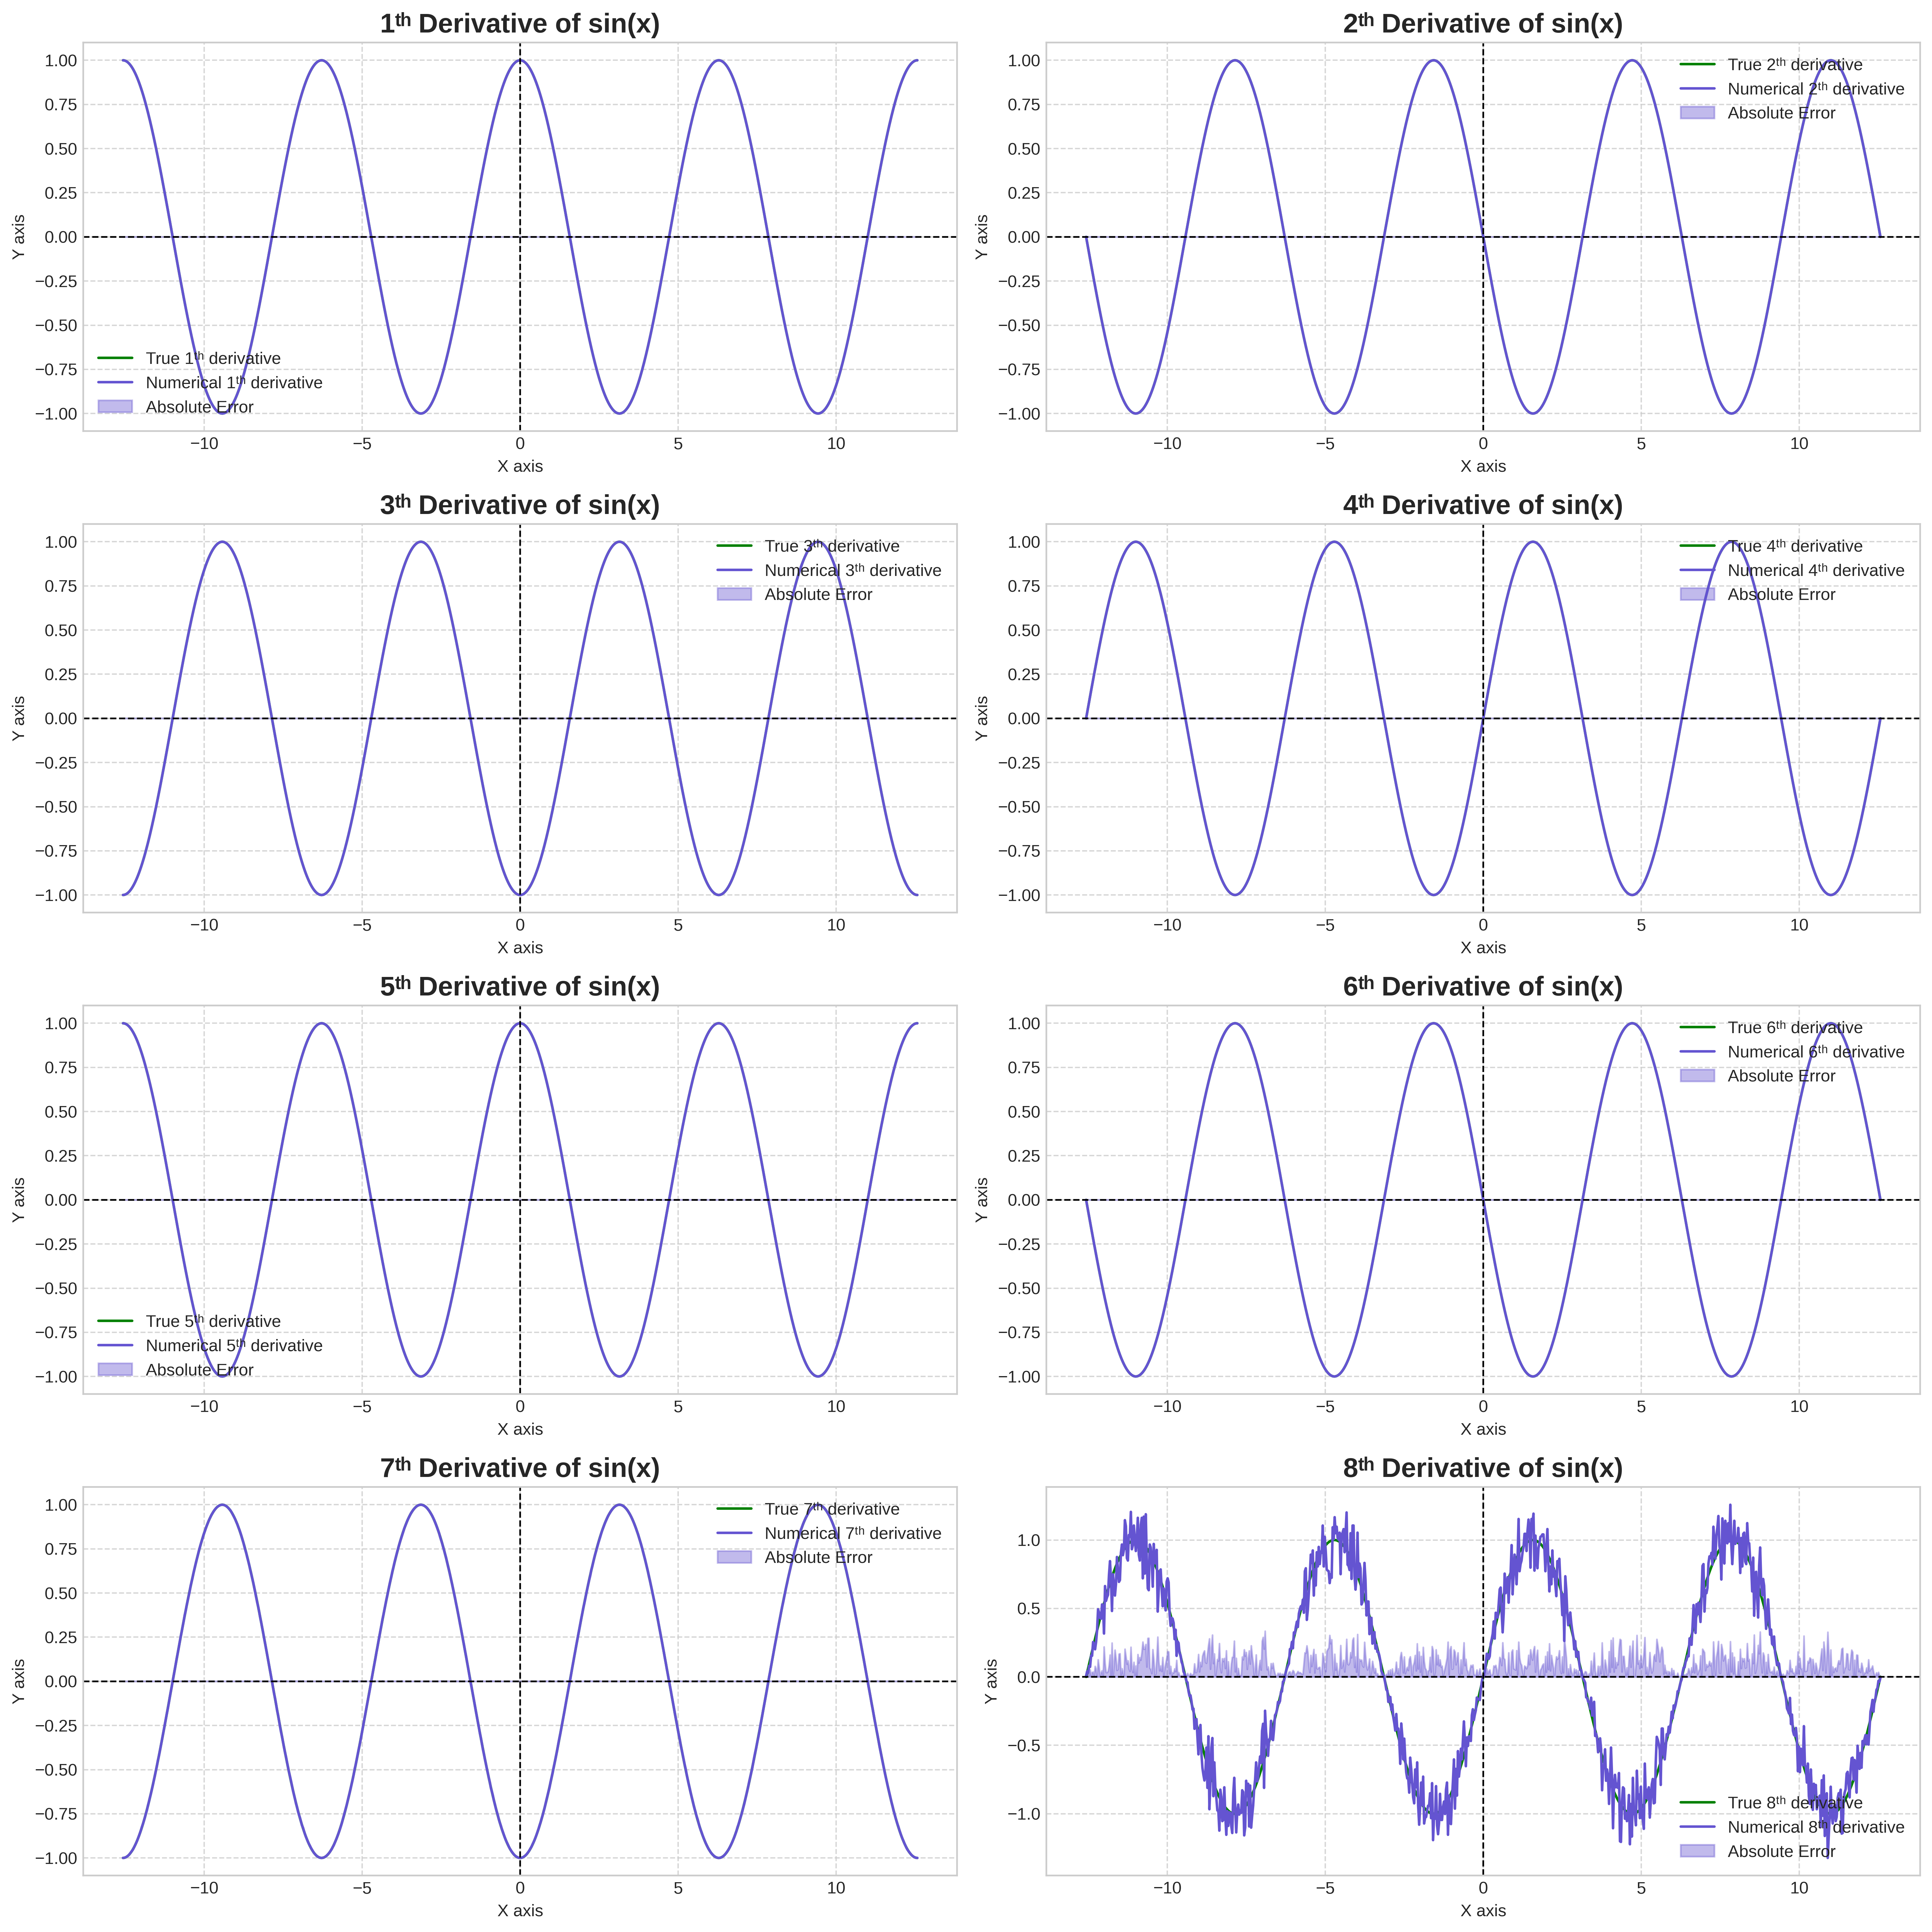

In [7]:
def true_derivative_sin(x, n):
    funcs = [
        lambda x: np.sin(x),
        lambda x: np.cos(x),
        lambda x: -np.sin(x),
        lambda x: -np.cos(x)
    ]
    return funcs[n % 4](x)


max_errors = []
orders = list(range(1, 9))
fig, axes = plt.subplots(int(orders[-1]/2) , 2, figsize=(16, 16), dpi=dpi)
axes = axes.flatten()

for n in orders:
    y_n_numeric = differentiate(func=sin, x=x, n=n)
    y_n_true = true_derivative_sin(x, n)
    error = np.abs(y_n_numeric - y_n_true)
    max_errors.append(np.max(error))

    ax = axes[n - 1]
    ax.plot(x, y_n_true, label=f"True {n}ᵗʰ derivative", color='green')
    ax.plot(x, y_n_numeric, label=f"Numerical {n}ᵗʰ derivative", color='#6454d1')
    ax.fill_between(x, error, color='#6454d1', alpha=0.4, label="Absolute Error")
    ax.axhline(y=0, color='black', linewidth=1, linestyle='--')
    ax.axvline(x=0, color='black', linewidth=1, linestyle='--')
    ax.set_title(f"{n}ᵗʰ Derivative of sin(x)", fontsize=16, weight="bold")
    ax.set_xlabel("X axis", fontsize=10)
    ax.set_ylabel("Y axis", fontsize=10)
    ax.legend()
    ax.grid(linestyle="--", alpha=0.8)

plt.tight_layout()
plt.show()

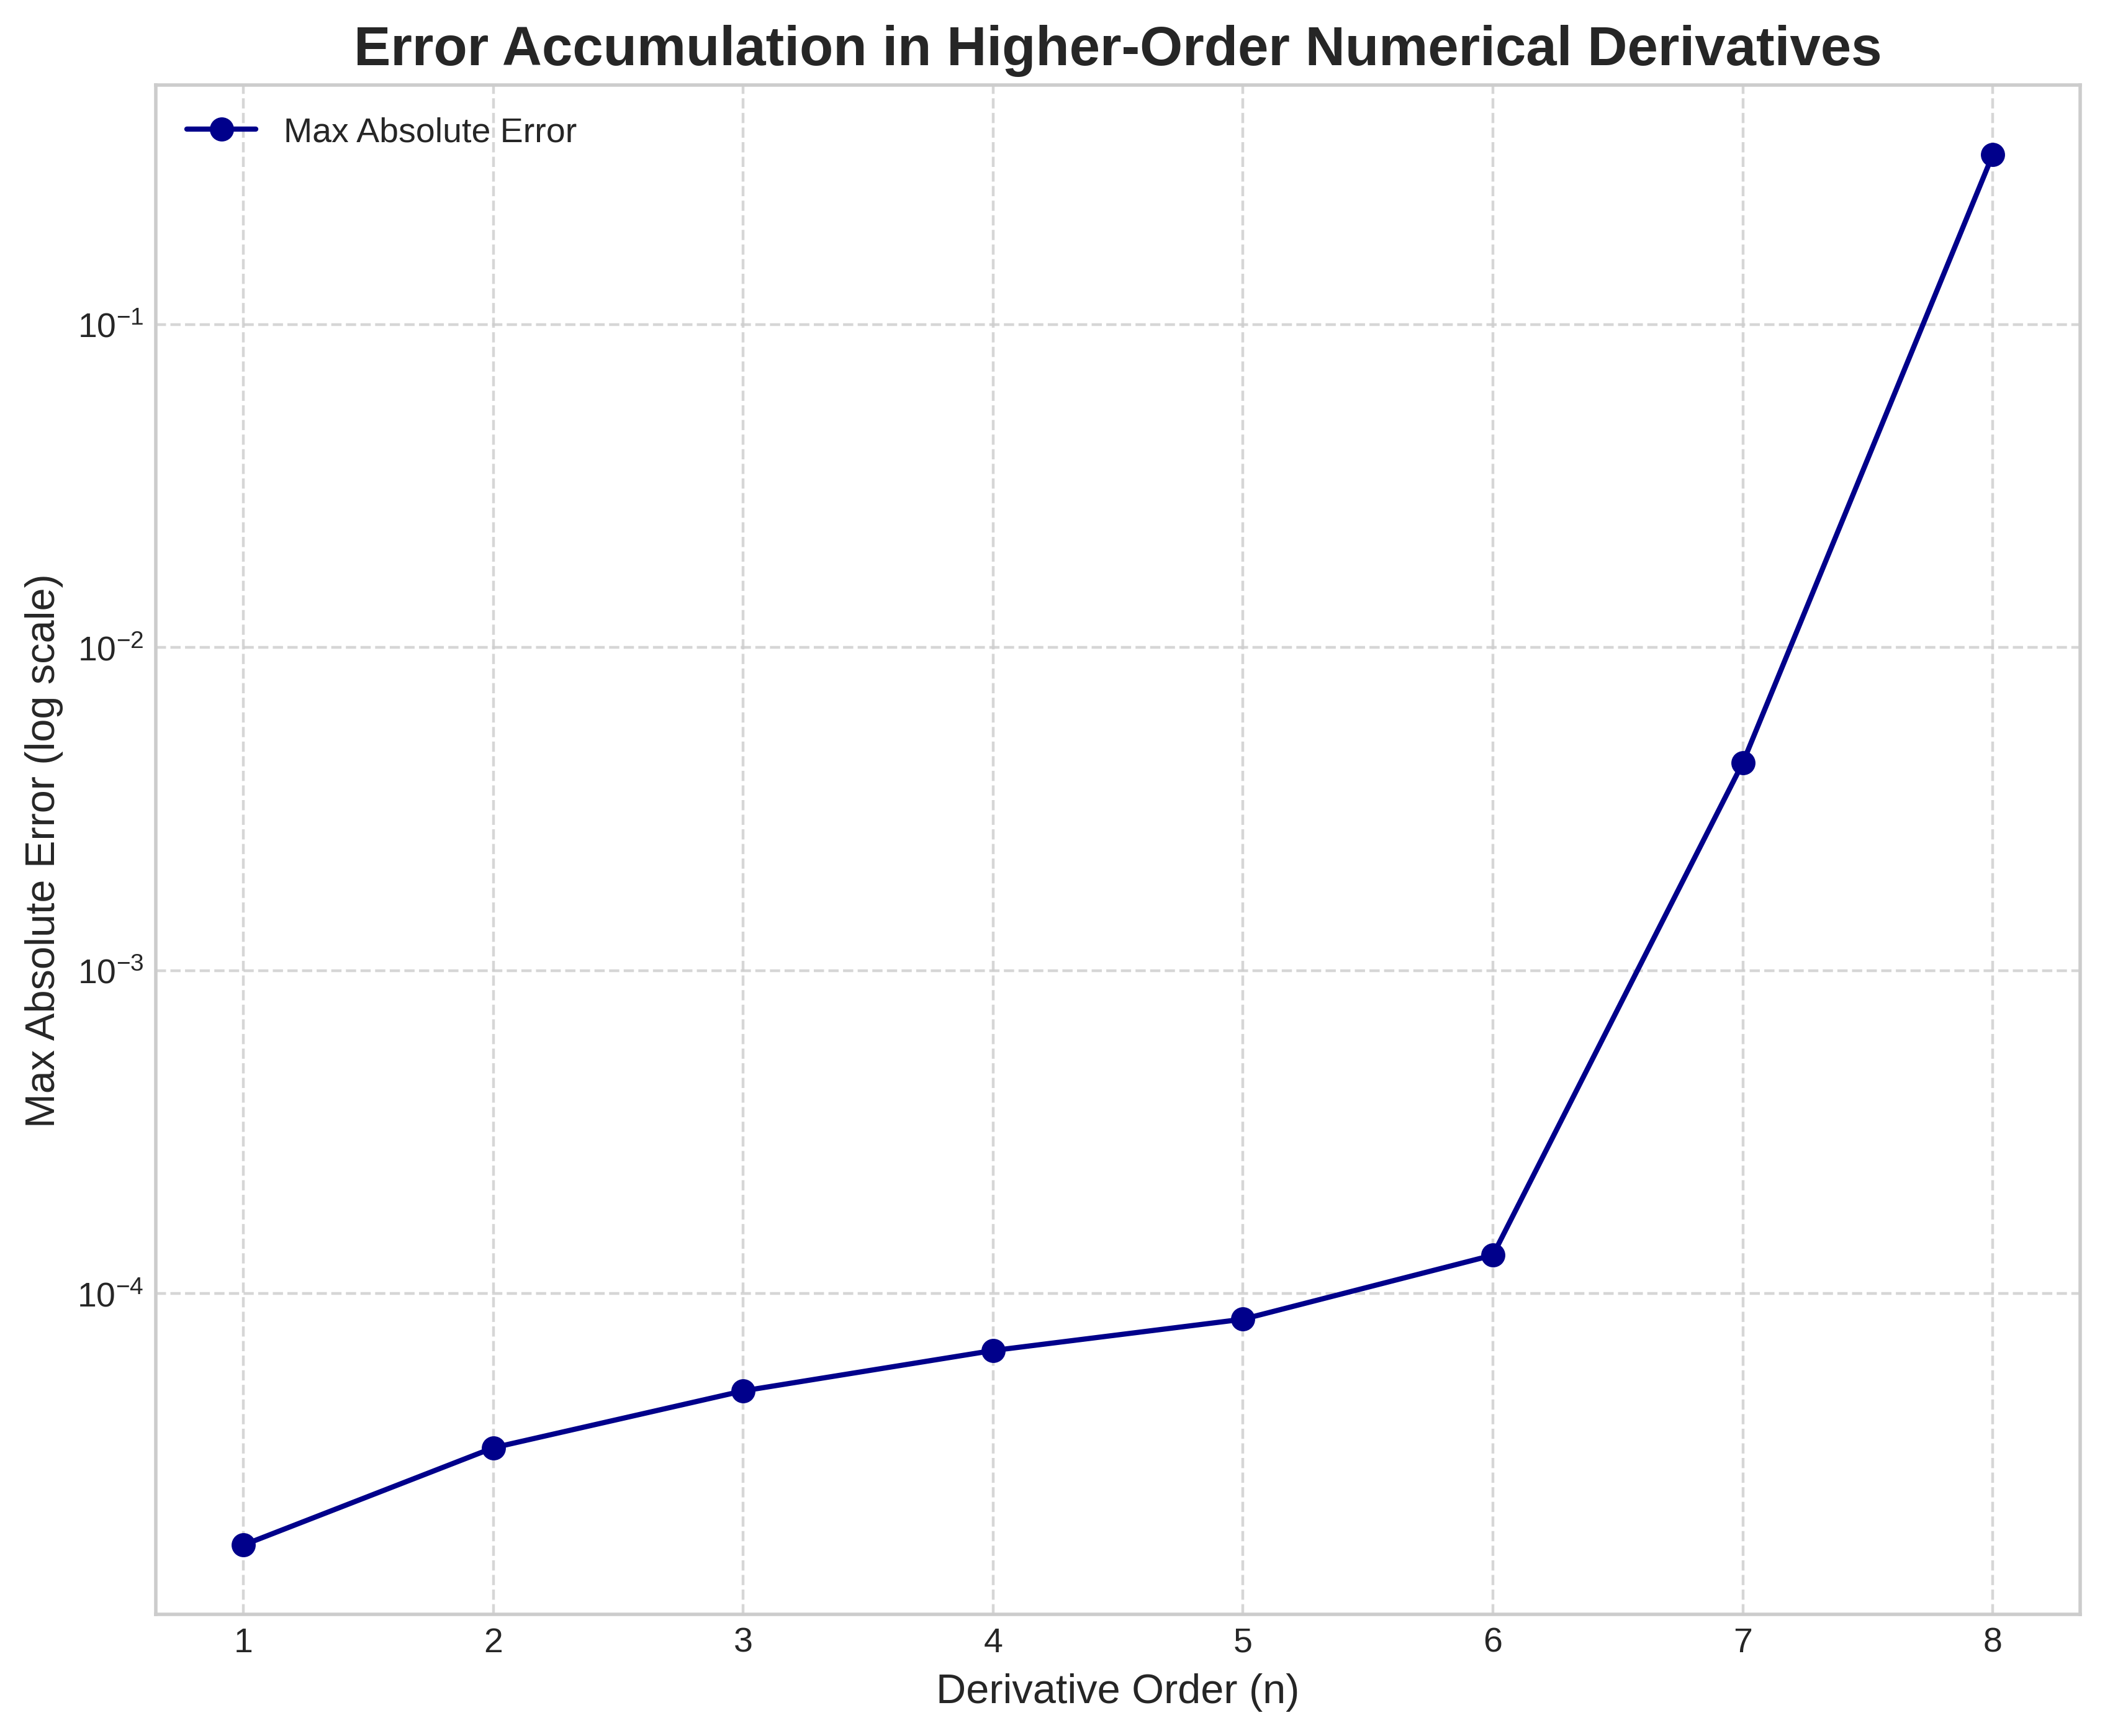

In [8]:
plt.figure(figsize=(10, 8), dpi=dpi)
plt.plot(orders, max_errors, marker='o', linestyle='-', color='darkblue', label='Max Absolute Error')
plt.yscale('log')
plt.xlabel("Derivative Order (n)", fontsize=12)
plt.ylabel("Max Absolute Error (log scale)", fontsize=12)
plt.title("Error Accumulation in Higher-Order Numerical Derivatives", fontsize=16, weight="bold")
plt.grid(linestyle='--', alpha=0.8)
plt.xticks(orders)
plt.legend()
plt.show()